In [35]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [36]:
analysis = scripts.Analysis()

In [37]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_5',
                          'wgt_0_0_0_0_0',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [38]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_5',
                               'wgt_0_0_0_0_0',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [39]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [40]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [41]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [42]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [43]:
fig.display_hrefanchor()

In [44]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [45]:
table_dgdgs.display_hrefanchor()

In [46]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

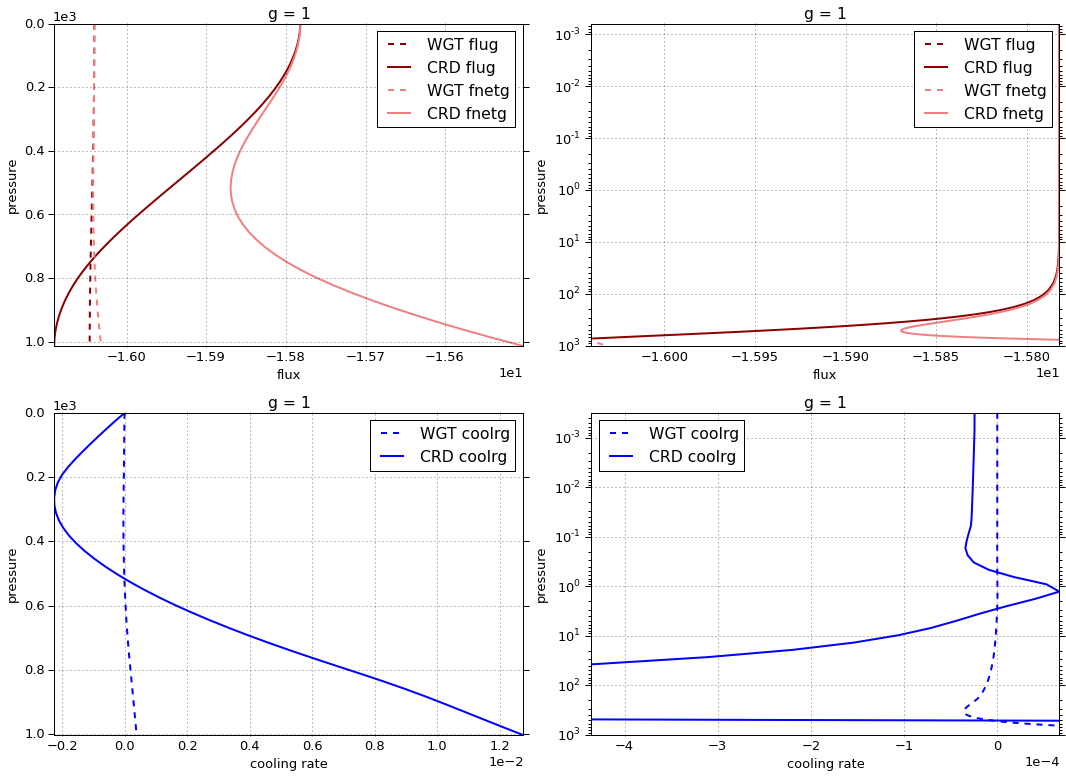

# Figure: flux, cooling rate. g-group 2

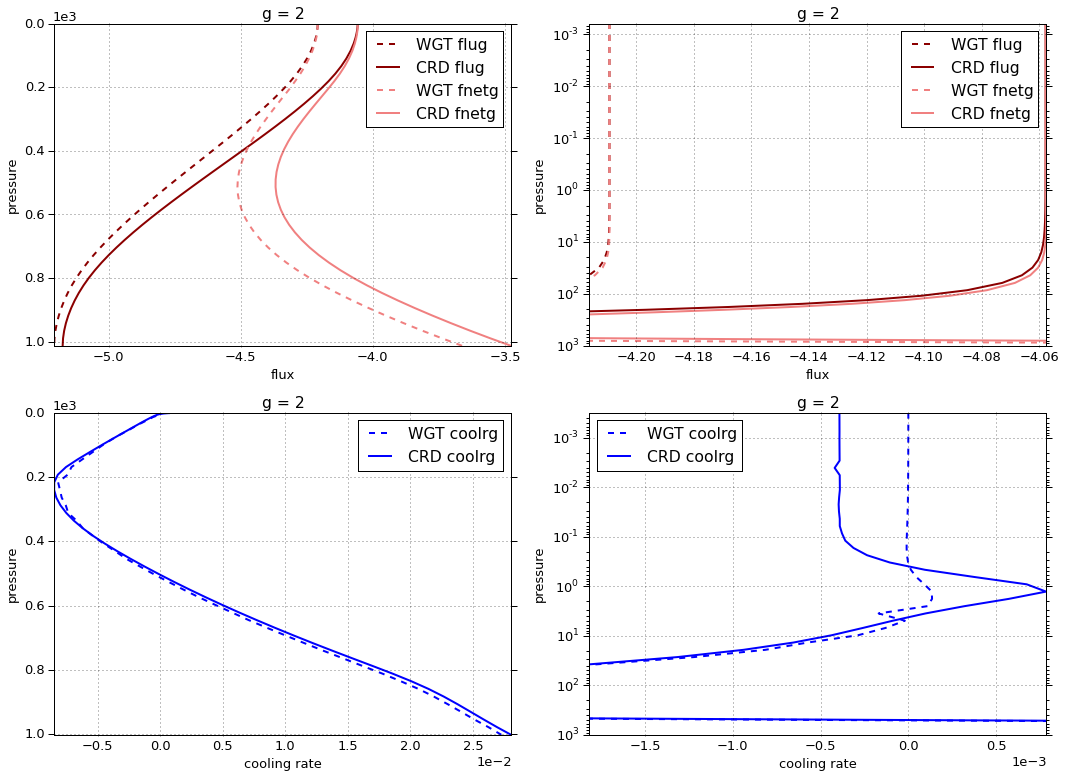

# Figure: flux, cooling rate. g-group 3

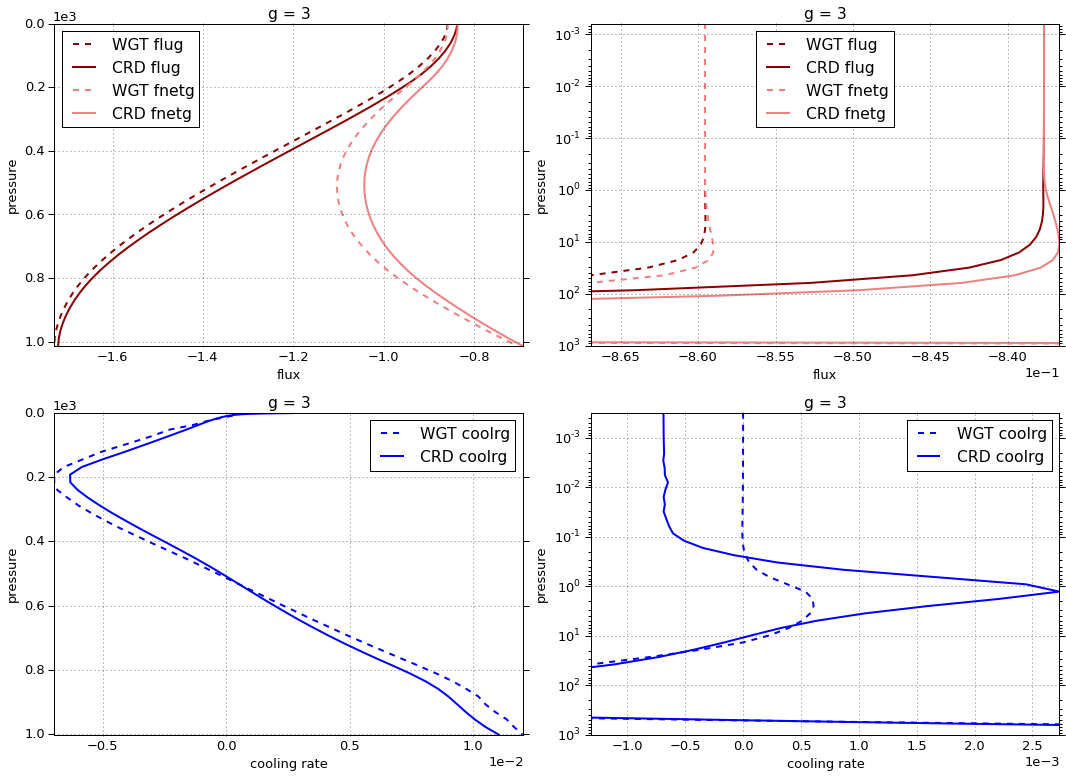

# Figure: flux, cooling rate. g-group 4

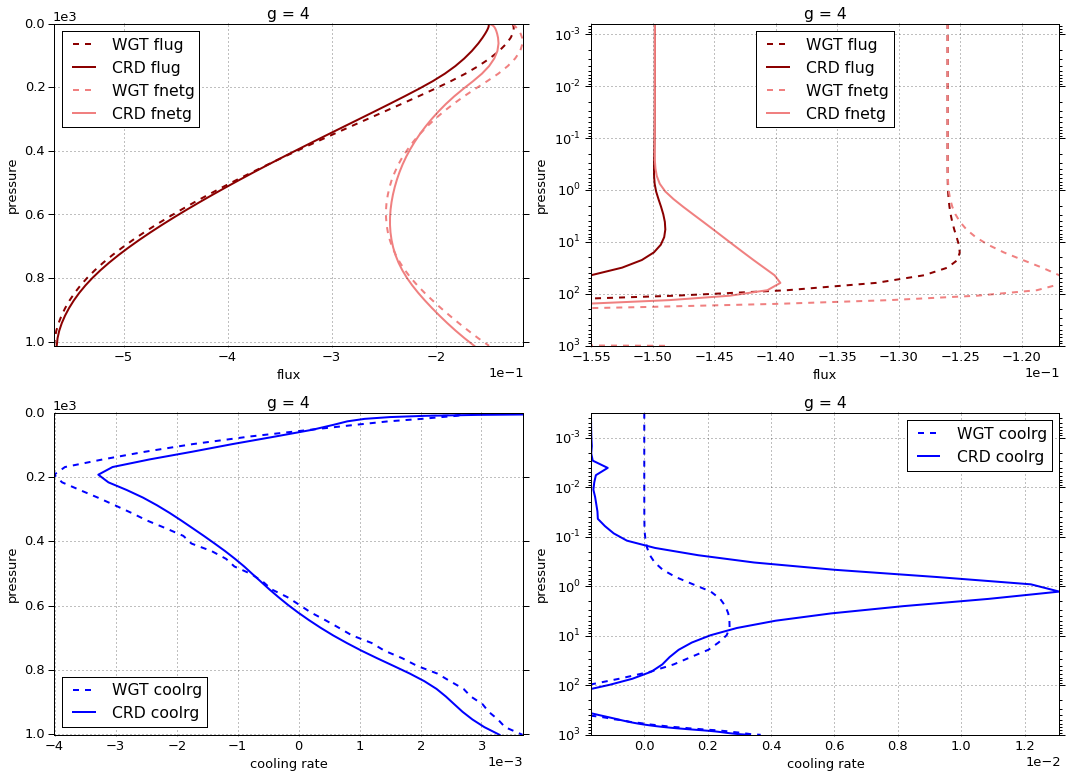

# Figure: flux, cooling rate. g-group 5

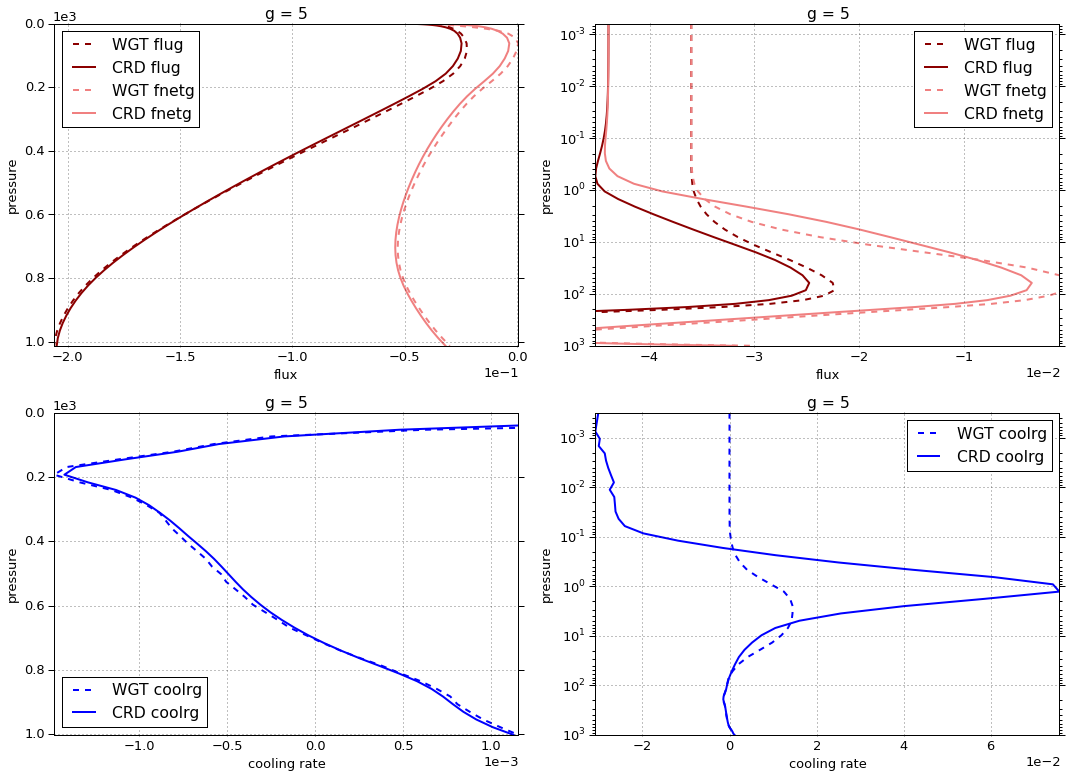

# Figure: flux, cooling rate. g-group total

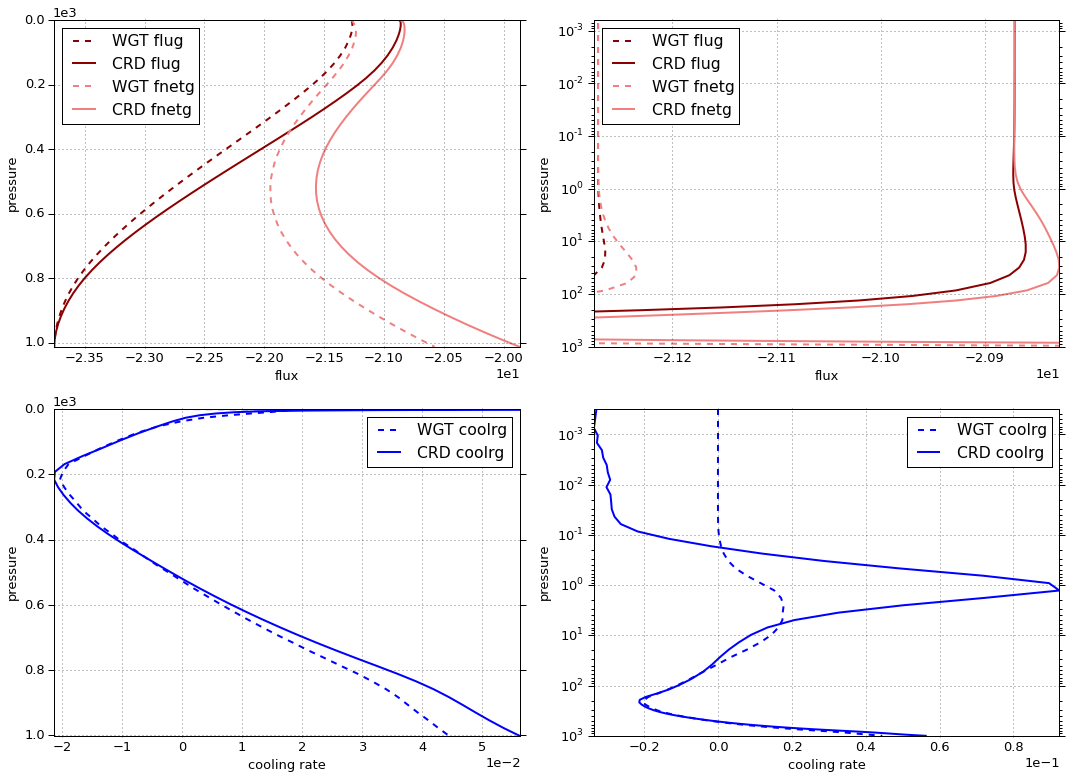

In [47]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [48]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.781963  0.000000 -15.781963
  1013     76    -16.090938  0.588028 -15.502910
2 0        1      -4.057822  0.000000  -4.057822
  1013     76     -5.174101  1.696558  -3.477544
3 0        1      -0.837654  0.000000  -0.837654
  1013     76     -1.720822  1.027999  -0.692824
4 0        1      -0.149837  0.000000  -0.149837
  1013     76     -0.564452  0.401463  -0.162989
5 0        1      -0.043910  0.000000  -0.043910
  1013     76     -0.204857  0.172943  -0.031914


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -16.040546  0.000000 -16.040546
  1013     76    -16.046320  0.014454 -16.031866
2 0        1      -4.209339  0.000000  -4.209339
  1013     76     -5.206227  1.543632  -3.662595
3 0        1      -0.859560  0.000000  -0.859560
  1013     76     -1.729673  1.024942  -0.704732
4 0        1      -0.126037  0.000000  -0.126037
  1013     76     -0.566958  0.418217  -0.148741
5 0        1      -0.036020  0.000000  -0.036020
  1013     76     -0.205993  0.175979  -0.030013


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.258583  0.000000 -0.258583
  1013     76     0.044618 -0.573574 -0.528956
2 0        1     -0.151517  0.000000 -0.151517
  1013     76    -0.032126 -0.152926 -0.185051
3 0        1     -0.021906  0.000000 -0.021906
  1013     76    -0.008851 -0.003057 -0.011908
4 0        1      0.023800  0.000000  0.023800
  1013     76    -0.002506  0.016754  0.014248
5 0        1      0.007891  0.000000  0.007891
  1013     76    -0.001136  0.003036  0.001900

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012721
2 0.000312    1     -0.000393
  1001.112500 75     0.028060
3 0.000312    1     -0.000688
  1001.112500 75     0.011055
4 0.000312    1     -0.001683
  1001.112500 75     0.003296
5 0.000312    1     -0.030129
  1001.112500 75     0.001127


WGT


coolrg
g pressure    layer              
1 0.000312    1      0.000000e+00
  1001.112500 75     3.864718e-04
2 0.000312    1     -4.620737e-08
  1001.112500 75     2.727930e-02
3 0.000312    1     -7.027320e-08
  1001.112500 75     1.200641e-02
4 0.000312    1     -7.298329e-09
  1001.112500 75     3.673901e-03
5 0.000312    1     -1.073135e-09
  1001.112500 75     1.154310e-03


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000024
  1001.112500 75    -0.012334
2 0.000312    1      0.000393
  1001.112500 75    -0.000780
3 0.000312    1      0.000688
  1001.112500 75     0.000951
4 0.000312    1      0.001683
  1001.112500 75     0.000378
5 0.000312    1      0.030129
  1001.112500 75     0.000027

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871187,0.00000,-20.871187
1013,76,-23.755171,3.88699,-19.868180



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-21.271502,0.000000,-21.271502
1013,76,-23.755171,3.177224,-20.577947



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-0.400315,0.000000,-0.400315
1013,76,0.000000,-0.709766,-0.709767


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032917
1001.112500,75,0.056259



WGT


,,coolrg
pressure,layer,
0.000312,1,-1.248520e-07
1001.112500,75,4.450039e-02



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.032917
1001.112500,75,-0.011758


In [49]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686000,0.675487
2,0.211758,0.219162
3,0.070636,0.072812
4,0.023212,0.023867
5,0.008394,0.008671


In [50]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -16.040546  0.000000e+00 -16.040546   1     1   
0.000624      1     2 -16.040546  2.999767e-16 -16.040546   1     2   
0.000876      1     3 -16.040546  7.546289e-16 -16.040546   1     3   
0.001229      1     4 -16.040546  1.668620e-15 -16.040546   1     4   
0.001723      1     5 -16.040546  3.796580e-15 -16.040546   1     5   
0.002417      1     6 -16.040546  8.043125e-15 -16.040546   1     6   
0.003391      1     7 -16.040546  1.637685e-14 -16.040546   1     7   
0.004757      1     8 -16.040546  3.275839e-14 -16.040546   1     8   
0.006672      1     9 -16.040546  6.490277e-14 -16.040546   1     9   
0.009359      1    10 -16.040546  1.285869e-13 -16.040546   1    10   
0.013128      1    11 -16.040546  2.553364e-13 -16.040546   1    11   
0.018415      1    12 -16.040546  5.055076e-13 -16.040546   1    12   
0.025830      1    13 -16.040546  1.002789e-12 -16.040546   1    13   
0.036232      1    14 -16.040546  1.990059e-12 -16.040546   1    14   
0.050823      1    15 -16.040546  3.972066e-12 -16.040546   1    15   
0.071291      1    16 -16.040546  8.296568e-12 -16.040546   1    16   
0.100000      1    17 -16.040546  1.944261e-11 -16.040546   1    17   
0.140271      1    18 -16.040546  5.155902e-11 -16.040546   1    18   
0.196760      1    19 -16.040546  1.453189e-10 -16.040546   1    19   
0.275997      1    20 -16.040546  4.167201e-10 -16.040546   1    20   
0.387100      1    21 -16.040546  1.194138e-09 -16.040546   1    21   
0.543100      1    22 -16.040546  3.400089e-09 -16.040546   1    22   
0.761700      1    23 -16.040546  9.507128e-09 -16.040546   1    23   
1.068500      1    24 -16.040546  2.483012e-08 -16.040546   1    24   
1.498800      1    25 -16.040546  5.576420e-08 -16.040546   1    25   
2.102400      1    26 -16.040546  1.044086e-07 -16.040546   1    26   
2.949000      1    27 -16.040546  1.750280e-07 -16.040546   1    27   
4.136600      1    28 -16.040547  2.749277e-07 -16.040546   1    28   
5.802500      1    29 -16.040547  4.156770e-07 -16.040546   1    29   
8.139200      1    30 -16.040547  6.157526e-07 -16.040547   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -16.041460  1.840640e-04 -16.041276   1    47   
347.300000    1    48 -16.041619  2.423918e-04 -16.041376   1    48   
371.075000    1    49 -16.041791  3.148672e-04 -16.041476   1    49   
394.850000    1    50 -16.041975  4.034465e-04 -16.041572   1    50   
418.625000    1    51 -16.042170  5.100832e-04 -16.041660   1    51   
442.400000    1    52 -16.042376  6.367357e-04 -16.041739   1    52   
466.175000    1    53 -16.042589  7.853182e-04 -16.041804   1    53   
489.950000    1    54 -16.042810  9.576981e-04 -16.041852   1    54   
513.725000    1    55 -16.043036  1.155742e-03 -16.041880   1    55   
537.500000    1    56 -16.043266  1.381361e-03 -16.041885   1    56   
561.275000    1    57 -16.043499  1.636531e-03 -16.041862   1    57   
585.050000    1    58 -16.043733  1.923284e-03 -16.041809   1    58   
608.825000    1    59 -16.043966  2.243694e-03 -16.041722   1    59   
632.600000    1    60 -16.044197  2.599870e-03 -16.041597   1    60   
656.375000    1    61 -16.044423  2.993938e-03 -16.041430   1    61   
680.150000    1    62 -16.044644  3.427975e-03 -16.041216   1    62   
703.925000    1    63 -16.044858  3.904074e-03 -16.040954   1    63   
727.700000    1    64 -16.045061  4.424363e-03 -16.040637   1    64   
751.475000    1    65 -16.045254  4.990931e-03 -16.040263   1    65   
775.250000    1    66 -16.045433  5.605747e-03 -16.039827   1    66   
799.025000    1    67 -16.045597  6.270477e-03 -16.039327   1    67   
822.800000    1    68 -16.045746  6.986126e-03 -16.038760   1    68   
846.575000    1    69 -16.045877  7.

In [51]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -4.209339  0.000000e+00 -4.209339   2     1 -4.057822   
0.000624      2     2 -4.209339  4.990950e-13 -4.209339   2     2 -4.057822   
0.000876      2     3 -4.209339  1.266861e-12 -4.209339   2     3 -4.057822   
0.001229      2     4 -4.209339  3.127443e-12 -4.209339   2     4 -4.057822   
0.001723      2     5 -4.209339  6.586205e-12 -4.209339   2     5 -4.057822   
0.002417      2     6 -4.209339  1.301751e-11 -4.209339   2     6 -4.057822   
0.003391      2     7 -4.209339  2.499005e-11 -4.209339   2     7 -4.057822   
0.004757      2     8 -4.209339  4.731115e-11 -4.209339   2     8 -4.057823   
0.006672      2     9 -4.209339  8.899209e-11 -4.209339   2     9 -4.057823   
0.009359      2    10 -4.209339  1.669686e-10 -4.209339   2    10 -4.057823   
0.013128      2    11 -4.209339  3.131306e-10 -4.209339   2    11 -4.057823   
0.018415      2    12 -4.209339  5.876782e-10 -4.209339   2    12 -4.057823   
0.025830      2    13 -4.209339  1.104518e-09 -4.209339   2    13 -4.057824   
0.036232      2    14 -4.209339  2.080037e-09 -4.209339   2    14 -4.057824   
0.050823      2    15 -4.209339  3.945658e-09 -4.209339   2    15 -4.057825   
0.071291      2    16 -4.209340  7.738615e-09 -4.209340   2    16 -4.057826   
0.100000      2    17 -4.209340  1.636157e-08 -4.209340   2    17 -4.057828   
0.140271      2    18 -4.209340  3.750064e-08 -4.209340   2    18 -4.057830   
0.196760      2    19 -4.209340  8.994508e-08 -4.209340   2    19 -4.057834   
0.275997      2    20 -4.209340  2.191351e-07 -4.209340   2    20 -4.057838   
0.387100      2    21 -4.209340  5.346124e-07 -4.209340   2    21 -4.057845   
0.543100      2    22 -4.209341  1.299301e-06 -4.209339   2    22 -4.057853   
0.761700      2    23 -4.209341  3.113218e-06 -4.209338   2    23 -4.057863   
1.068500      2    24 -4.209342  7.125475e-06 -4.209335   2    24 -4.057873   
1.498800      2    25 -4.209343  1.493420e-05 -4.209328   2    25 -4.057886   
2.102400      2    26 -4.209346  2.782002e-05 -4.209319   2    26 -4.057909   
2.949000      2    27 -4.209356  4.801577e-05 -4.209308   2    27 -4.057952   
4.136600      2    28 -4.209411  7.917068e-05 -4.209331   2    28 -4.058027   
5.802500      2    29 -4.209463  1.272272e-04 -4.209335   2    29 -4.058152   
8.139200      2    30 -4.209573  2.018345e-04 -4.209372   2    30 -4.058360   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.494464  6.949451e-02 -4.424969   2    47 -4.369618   
347.300000    2    48 -4.529062  8.526389e-02 -4.443798   2    48 -4.408024   
371.075000    2    49 -4.564514  1.033055e-01 -4.461209   2    49 -4.447167   
394.850000    2    50 -4.600376  1.240348e-01 -4.476341   2    50 -4.486830   
418.625000    2    51 -4.636333  1.472324e-01 -4.489101   2    51 -4.526790   
442.400000    2    52 -4.672383  1.731654e-01 -4.499218   2    52 -4.566858   
466.175000    2    53 -4.708408  2.015791e-01 -4.506829   2    53 -4.606871   
489.950000    2    54 -4.744172  2.328083e-01 -4.511363   2    54 -4.646673   
513.725000    2    55 -4.779514  2.667108e-01 -4.512803   2    55 -4.686122   
537.500000    2    56 -4.814299  3.033581e-01 -4.510941   2    56 -4.725073   
561.275000    2    57 -4.848422  3.426802e-01 -4.505742   2    57 -4.763374   
585.050000    2    58 -4.881744  3.846583e-01 -4.497086   2    58 -4.800869   
608.825000    2    59 -4.914081  4.293546e-01 -4.484726   2    59 -4.837399   
632.600000    2    60 -4.945377  4.767843e-01 -4.468593   2    60 -4.872804   
656.375000    2    61 -4.975465  5.267925e-01 -4.448672   2    61 -4.906916   
680.150000    2    62 -5.004182  5.795085e-01 -4.424674   2    62 -4.939564   
703.925000    2    63 -5.031354  6.348463e-01 -4.396508   2   

In [52]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.859560  0.000000e+00 -0.859560   3     1 -0.837654   
0.000624      3     2 -0.859560  1.705393e-12 -0.859560   3     2 -0.837654   
0.000876      3     3 -0.859560  4.360822e-12 -0.859560   3     3 -0.837654   
0.001229      3     4 -0.859560  1.040341e-11 -0.859560   3     4 -0.837654   
0.001723      3     5 -0.859560  2.147607e-11 -0.859560   3     5 -0.837654   
0.002417      3     6 -0.859560  4.178453e-11 -0.859560   3     6 -0.837654   
0.003391      3     7 -0.859560  7.910459e-11 -0.859560   3     7 -0.837654   
0.004757      3     8 -0.859560  1.478373e-10 -0.859560   3     8 -0.837654   
0.006672      3     9 -0.859560  2.747106e-10 -0.859560   3     9 -0.837655   
0.009359      3    10 -0.859560  5.094854e-10 -0.859560   3    10 -0.837655   
0.013128      3    11 -0.859560  9.450257e-10 -0.859560   3    11 -0.837655   
0.018415      3    12 -0.859560  1.755143e-09 -0.859560   3    12 -0.837656   
0.025830      3    13 -0.859560  3.266048e-09 -0.859560   3    13 -0.837657   
0.036232      3    14 -0.859560  6.092659e-09 -0.859560   3    14 -0.837658   
0.050823      3    15 -0.859560  1.145290e-08 -0.859560   3    15 -0.837659   
0.071291      3    16 -0.859560  2.226231e-08 -0.859560   3    16 -0.837661   
0.100000      3    17 -0.859560  4.663215e-08 -0.859560   3    17 -0.837664   
0.140271      3    18 -0.859560  1.058216e-07 -0.859560   3    18 -0.837668   
0.196760      3    19 -0.859560  2.511758e-07 -0.859560   3    19 -0.837674   
0.275997      3    20 -0.859560  6.052943e-07 -0.859560   3    20 -0.837682   
0.387100      3    21 -0.859561  1.459783e-06 -0.859559   3    21 -0.837691   
0.543100      3    22 -0.859560  3.504682e-06 -0.859557   3    22 -0.837700   
0.761700      3    23 -0.859559  8.290008e-06 -0.859551   3    23 -0.837706   
1.068500      3    24 -0.859556  1.874511e-05 -0.859537   3    24 -0.837704   
1.498800      3    25 -0.859549  3.897747e-05 -0.859510   3    25 -0.837695   
2.102400      3    26 -0.859539  7.236689e-05 -0.859467   3    26 -0.837696   
2.949000      3    27 -0.859530  1.247125e-04 -0.859406   3    27 -0.837723   
4.136600      3    28 -0.859530  2.053483e-04 -0.859324   3    28 -0.837793   
5.802500      3    29 -0.859553  3.292367e-04 -0.859223   3    29 -0.837930   
8.139200      3    30 -0.859635  5.201778e-04 -0.859115   3    30 -0.838168   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -1.140267  9.553482e-02 -1.044732   3    47 -1.108617   
347.300000    3    48 -1.171549  1.130293e-01 -1.058520   3    48 -1.139586   
371.075000    3    49 -1.202945  1.323449e-01 -1.070600   3    49 -1.170758   
394.850000    3    50 -1.234295  1.534845e-01 -1.080810   3    50 -1.201982   
418.625000    3    51 -1.265474  1.763171e-01 -1.089157   3    51 -1.233101   
442.400000    3    52 -1.296330  2.007445e-01 -1.095586   3    52 -1.263999   
466.175000    3    53 -1.326776  2.266850e-01 -1.100091   3    53 -1.294588   
489.950000    3    54 -1.356721  2.539293e-01 -1.102792   3    54 -1.324789   
513.725000    3    55 -1.386075  2.824071e-01 -1.103668   3    55 -1.354540   
537.500000    3    56 -1.414777  3.120229e-01 -1.102754   3    56 -1.383770   
561.275000    3    57 -1.442754  3.426994e-01 -1.100054   3    57 -1.412407   
585.050000    3    58 -1.469906  3.743712e-01 -1.095535   3    58 -1.440364   
608.825000    3    59 -1.496155  4.069292e-01 -1.089225   3    59 -1.467550   
632.600000    3    60 -1.521404  4.403359e-01 -1.081068   3    60 -1.493871   
656.375000    3    61 -1.545567  4.744922e-01 -1.071074   3    61 -1.519226   
680.150000    3    62 -1.568547  5.093978e-01 -1.059149   3    62 -1.543505   
703.925000    3    63 -1.590242  5.449058e-01 -1.045336   3   

In [53]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.126037  0.000000e+00 -0.126037   4     1 -0.149837   
0.000624      4     2 -0.126037  1.324349e-12 -0.126037   4     2 -0.149837   
0.000876      4     3 -0.126037  7.064373e-12 -0.126037   4     3 -0.149837   
0.001229      4     4 -0.126037  3.926795e-11 -0.126037   4     4 -0.149837   
0.001723      4     5 -0.126037  9.722504e-11 -0.126037   4     5 -0.149838   
0.002417      4     6 -0.126037  2.013052e-10 -0.126037   4     6 -0.149838   
0.003391      4     7 -0.126037  3.884502e-10 -0.126037   4     7 -0.149838   
0.004757      4     8 -0.126037  7.256548e-10 -0.126037   4     8 -0.149838   
0.006672      4     9 -0.126037  1.334669e-09 -0.126037   4     9 -0.149839   
0.009359      4    10 -0.126037  2.437452e-09 -0.126037   4    10 -0.149840   
0.013128      4    11 -0.126037  4.439617e-09 -0.126037   4    11 -0.149841   
0.018415      4    12 -0.126037  8.084525e-09 -0.126037   4    12 -0.149842   
0.025830      4    13 -0.126037  1.473810e-08 -0.126037   4    13 -0.149844   
0.036232      4    14 -0.126037  2.692102e-08 -0.126037   4    14 -0.149847   
0.050823      4    15 -0.126037  4.952977e-08 -0.126037   4    15 -0.149851   
0.071291      4    16 -0.126037  9.404876e-08 -0.126037   4    16 -0.149856   
0.100000      4    17 -0.126037  1.915340e-07 -0.126037   4    17 -0.149863   
0.140271      4    18 -0.126037  4.206945e-07 -0.126037   4    18 -0.149874   
0.196760      4    19 -0.126037  9.651894e-07 -0.126036   4    19 -0.149887   
0.275997      4    20 -0.126037  2.248594e-06 -0.126035   4    20 -0.149899   
0.387100      4    21 -0.126036  5.244690e-06 -0.126030   4    21 -0.149909   
0.543100      4    22 -0.126032  1.218120e-05 -0.126020   4    22 -0.149903   
0.761700      4    23 -0.126022  2.788549e-05 -0.125994   4    23 -0.149856   
1.068500      4    24 -0.125999  6.118046e-05 -0.125938   4    24 -0.149739   
1.498800      4    25 -0.125955  1.243447e-04 -0.125831   4    25 -0.149547   
2.102400      4    26 -0.125887  2.274116e-04 -0.125660   4    26 -0.149339   
2.949000      4    27 -0.125790  3.872903e-04 -0.125403   4    27 -0.149155   
4.136600      4    28 -0.125661  6.304287e-04 -0.125030   4    28 -0.149026   
5.802500      4    29 -0.125498  9.976609e-04 -0.124500   4    29 -0.148988   
8.139200      4    30 -0.125305  1.550177e-03 -0.123755   4    30 -0.149080   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.281973  7.351592e-02 -0.208457   4    47 -0.288262   
347.300000    4    48 -0.298293  8.283464e-02 -0.215459   4    48 -0.302981   
371.075000    4    49 -0.314386  9.278238e-02 -0.221604   4    49 -0.317628   
394.850000    4    50 -0.330230  1.032956e-01 -0.226934   4    50 -0.332144   
418.625000    4    51 -0.345902  1.140103e-01 -0.231891   4    51 -0.346478   
442.400000    4    52 -0.361132  1.252263e-01 -0.235906   4    52 -0.360584   
466.175000    4    53 -0.376025  1.367632e-01 -0.239262   4    53 -0.374441   
489.950000    4    54 -0.390669  1.484367e-01 -0.242232   4    54 -0.388032   
513.725000    4    55 -0.404776  1.603621e-01 -0.244414   4    55 -0.401351   
537.500000    4    56 -0.418529  1.724661e-01 -0.246063   4    56 -0.414384   
561.275000    4    57 -0.431946  1.846373e-01 -0.247309   4    57 -0.427113   
585.050000    4    58 -0.444780  1.969448e-01 -0.247835   4    58 -0.439514   
608.825000    4    59 -0.457200  2.093881e-01 -0.247812   4    59 -0.451554   
632.600000    4    60 -0.469110  2.218545e-01 -0.247255   4    60 -0.463201   
656.375000    4    61 -0.480478  2.344451e-01 -0.246033   4    61 -0.474419   
680.150000    4    62 -0.491262  2.470805e-01 -0.244182   4    62 -0.485167   
703.925000    4    63 -0.501432  2.597099e-01 -0.241722   4   

In [54]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.036020  0.000000e+00 -0.036020   5     1 -0.043910   
0.000624      5     2 -0.036020  1.398343e-13 -0.036020   5     2 -0.043914   
0.000876      5     3 -0.036020  3.976152e-12 -0.036020   5     3 -0.043915   
0.001229      5     4 -0.036020  5.995910e-10 -0.036020   5     4 -0.043916   
0.001723      5     5 -0.036020  1.627982e-09 -0.036020   5     5 -0.043919   
0.002417      5     6 -0.036020  3.389016e-09 -0.036020   5     6 -0.043922   
0.003391      5     7 -0.036020  6.403195e-09 -0.036020   5     7 -0.043927   
0.004757      5     8 -0.036020  1.157059e-08 -0.036020   5     8 -0.043933   
0.006672      5     9 -0.036020  2.045060e-08 -0.036020   5     9 -0.043942   
0.009359      5    10 -0.036020  3.575485e-08 -0.036020   5    10 -0.043955   
0.013128      5    11 -0.036020  6.221241e-08 -0.036020   5    11 -0.043973   
0.018415      5    12 -0.036020  1.081007e-07 -0.036020   5    12 -0.043998   
0.025830      5    13 -0.036020  1.879566e-07 -0.036020   5    13 -0.044033   
0.036232      5    14 -0.036020  3.274454e-07 -0.036020   5    14 -0.044082   
0.050823      5    15 -0.036020  5.745418e-07 -0.036020   5    15 -0.044150   
0.071291      5    16 -0.036021  1.037334e-06 -0.036020   5    16 -0.044244   
0.100000      5    17 -0.036021  1.991365e-06 -0.036019   5    17 -0.044369   
0.140271      5    18 -0.036022  4.089250e-06 -0.036017   5    18 -0.044527   
0.196760      5    19 -0.036021  8.753881e-06 -0.036013   5    19 -0.044713   
0.275997      5    20 -0.036019  1.905161e-05 -0.036000   5    20 -0.044916   
0.387100      5    21 -0.036010  4.158607e-05 -0.035968   5    21 -0.045097   
0.543100      5    22 -0.035984  9.052447e-05 -0.035894   5    22 -0.045169   
0.761700      5    23 -0.035918  1.945188e-04 -0.035724   5    23 -0.044966   
1.068500      5    24 -0.035780  4.024510e-04 -0.035378   5    24 -0.044282   
1.498800      5    25 -0.035521  7.801251e-04 -0.034741   5    25 -0.042997   
2.102400      5    26 -0.035122  1.376699e-03 -0.033746   5    26 -0.041395   
2.949000      5    27 -0.034560  2.268730e-03 -0.032291   5    27 -0.039621   
4.136600      5    28 -0.033801  3.545524e-03 -0.030255   5    28 -0.037758   
5.802500      5    29 -0.032814  5.373909e-03 -0.027440   5    29 -0.035839   
8.139200      5    30 -0.031571  7.846417e-03 -0.023725   5    30 -0.033868   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.072038  4.134394e-02 -0.030694   5    47 -0.074702   
347.300000    5    48 -0.079013  4.592423e-02 -0.033089   5    48 -0.081400   
371.075000    5    49 -0.085949  5.056109e-02 -0.035388   5    49 -0.088099   
394.850000    5    50 -0.092842  5.528719e-02 -0.037555   5    50 -0.094749   
418.625000    5    51 -0.099665  6.006884e-02 -0.039596   5    51 -0.101326   
442.400000    5    52 -0.106401  6.491048e-02 -0.041491   5    52 -0.107810   
466.175000    5    53 -0.113017  6.977312e-02 -0.043244   5    53 -0.114190   
489.950000    5    54 -0.119525  7.462635e-02 -0.044899   5    54 -0.120457   
513.725000    5    55 -0.125897  7.948971e-02 -0.046407   5    55 -0.126609   
537.500000    5    56 -0.132184  8.434975e-02 -0.047834   5    56 -0.132645   
561.275000    5    57 -0.138305  8.919570e-02 -0.049109   5    57 -0.138558   
585.050000    5    58 -0.144300  9.406467e-02 -0.050236   5    58 -0.144341   
608.825000    5    59 -0.150139  9.890585e-02 -0.051234   5    59 -0.149976   
632.600000    5    60 -0.155792  1.037620e-01 -0.052030   5    60 -0.155453   
656.375000    5    61 -0.161243  1.086152e-01 -0.052628   5    61 -0.160750   
680.150000    5    62 -0.166511  1.134728e-01 -0.053038   5    62 -0.165851   
703.925000    5    63 -0.171518  1.183379e-01 -0.053180   5   

In [55]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')